## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PowerTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, PoissonRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="SeriesGroupBy.grouper")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in sqrt")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in log1p")

In [2]:
df = pd.read_excel('../Data/Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df1 = df.copy()

In [5]:
df1.drop(['Row ID','Order ID','Customer ID','Customer Name','Product ID','Country'], axis=1, inplace=True)
df1.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Date     9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   City          9994 non-null   object        
 5   State         9994 non-null   object        
 6   Postal Code   9994 non-null   int64         
 7   Region        9994 non-null   object        
 8   Category      9994 non-null   object        
 9   Sub-Category  9994 non-null   object        
 10  Product Name  9994 non-null   object        
 11  Sales         9994 non-null   float64       
 12  Quantity      9994 non-null   int64         
 13  Discount      9994 non-null   float64       
 14  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int6

In [7]:
numeric_features = df1.select_dtypes(include=['int64','float64'])
numeric_features

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028
9990,92627,91.9600,2,0.00,15.6332
9991,92627,258.5760,2,0.20,19.3932
9992,92627,29.6000,4,0.00,13.3200


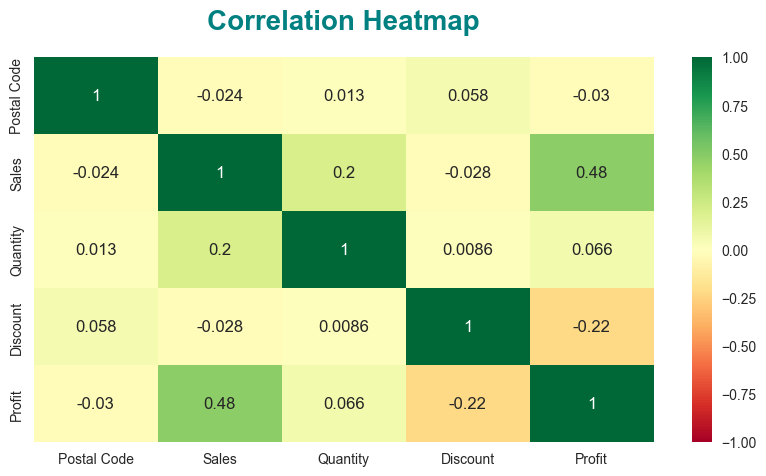

In [8]:
plt.figure(figsize=(10,5))
fig = sns.heatmap(numeric_features.corr(),annot=True,cmap='RdYlGn',vmin=-1.0,vmax=1.0)
plt.title('Correlation Heatmap',pad=20,fontsize=20,fontweight='bold',color='teal')
plt.show()
plt.close('all')

## Feature Engineering

### Categorical Encoding

In [9]:
df_unique_count = pd.DataFrame()

def unique_count(df, col):
    if df[col].dtype =='object':
        df_unique_count[col] = [df[col].unique()]
        
    else:
        df_unique_count[col] = [df[col].nunique()]
        
    return df_unique_count

for col in df1.columns.tolist():
    unique_count(df1,col)

In [10]:
df_unique_count

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1238,1334,"[Second Class, Standard Class, First Class, Sa...","[Consumer, Corporate, Home Office]","[Henderson, Los Angeles, Fort Lauderdale, Conc...","[Kentucky, California, Florida, North Carolina...",631,"[South, West, Central, East]","[Furniture, Office Supplies, Technology]","[Bookcases, Chairs, Labels, Tables, Storage, F...","[Bush Somerset Collection Bookcase, Hon Deluxe...",6144,14,12,7545


### Feature Extraction

In [11]:
df1['Profit Margin'] = df1['Profit']/df1['Sales']
df1['Discounted Profit'] = df1['Profit']-df1['Profit'] * df1['Discount']
df1['Discount Percentage'] = df1['Discount'] / df1['Sales'] * 100
df1['Operating Expenses'] = df1['Sales'] - df1['Profit']
df1['Net Profit'] = df1['Profit'] - df1['Discount']

In [12]:
# df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%d-%m-%Y')
# df1['Ship Date'] = pd.to_datetime(df1['Ship Date'], format='%d-%m-%Y')
df1['Order Date'] = pd.to_datetime(df1['Order Date'],errors='coerce')
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'],errors='coerce')

In [13]:
df1['Order Year'] = df1['Order Date'].dt.year
df1['Order Month'] = df1['Order Date'].dt.month
df1['Order Day'] = df1['Order Date'].dt.day
df1['Order Weekday'] = df1['Order Date'].dt.dayofweek
df1['Ship Year'] = df1['Ship Date'].dt.year
df1['Ship Month'] = df1['Ship Date'].dt.month
df1['Ship Day'] = df1['Ship Date'].dt.day
df1['Ship Weekday'] = df1['Ship Date'].dt.dayofweek
df1.drop(['Order Date','Ship Date'],axis=1,inplace=True)

In [14]:
df1.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,...,Operating Expenses,Net Profit,Order Year,Order Month,Order Day,Order Weekday,Ship Year,Ship Month,Ship Day,Ship Weekday
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,...,220.0464,41.9136,2013,11,9,5,2013,11,12,1
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,...,512.3580,219.5820,2013,11,9,5,2013,11,12,1
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,...,7.7486,6.8714,2013,6,13,3,2013,6,17,0
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,...,1340.6085,-383.4810,2012,10,11,3,2012,10,18,3
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,...,19.8516,2.3164,2012,10,11,3,2012,10,18,3


In [15]:
def onehotencode(df,col):
    encoder = OneHotEncoder(drop='first',sparse_output=False,max_categories=10)
    encoded_data = encoder.fit_transform(df[[col]])
    encoded_data = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
    
    return encoded_data

In [16]:
categorical_col = df1.select_dtypes(include='object').columns.tolist()
categorical_col

['Ship Mode',
 'Segment',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Product Name']

In [17]:
for col in categorical_col:
    encoding_data = onehotencode(df1,col)
    df1 = pd.concat([df1,encoding_data], axis=1)
    df1.drop(col, axis=1, inplace=True)

In [18]:
df1.head()

,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin,Discounted Profit,Discount Percentage,Operating Expenses,Net Profit,...,Sub-Category_infrequent_sklearn,Product Name_GBC Premium Transparent Covers with Diagonal Lined Pattern,"Product Name_Global High-Back Leather Tilter, Burgundy","Product Name_Global Wood Trimmed Manager's Task Chair, Khaki",Product Name_KI Adjustable-Height Table,Product Name_Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,"Product Name_Situations Contoured Folding Chairs, 4/Set",Product Name_Staples,Product Name_Storex Dura Pro Binders,Product Name_infrequent_sklearn
0,42420,261.9600,2,0.00,41.9136,0.1600,41.91360,0.000000,220.0464,41.9136,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,42420,731.9400,3,0.00,219.5820,0.3000,219.58200,0.000000,512.3580,219.5820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,90036,14.6200,2,0.00,6.8714,0.4700,6.87140,0.000000,7.7486,6.8714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33311,957.5775,5,0.45,-383.0310,-0.4000,-210.66705,0.046994,1340.6085,-383.4810,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33311,22.3680,2,0.20,2.5164,0.1125,2.01312,0.894134,19.8516,2.3164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


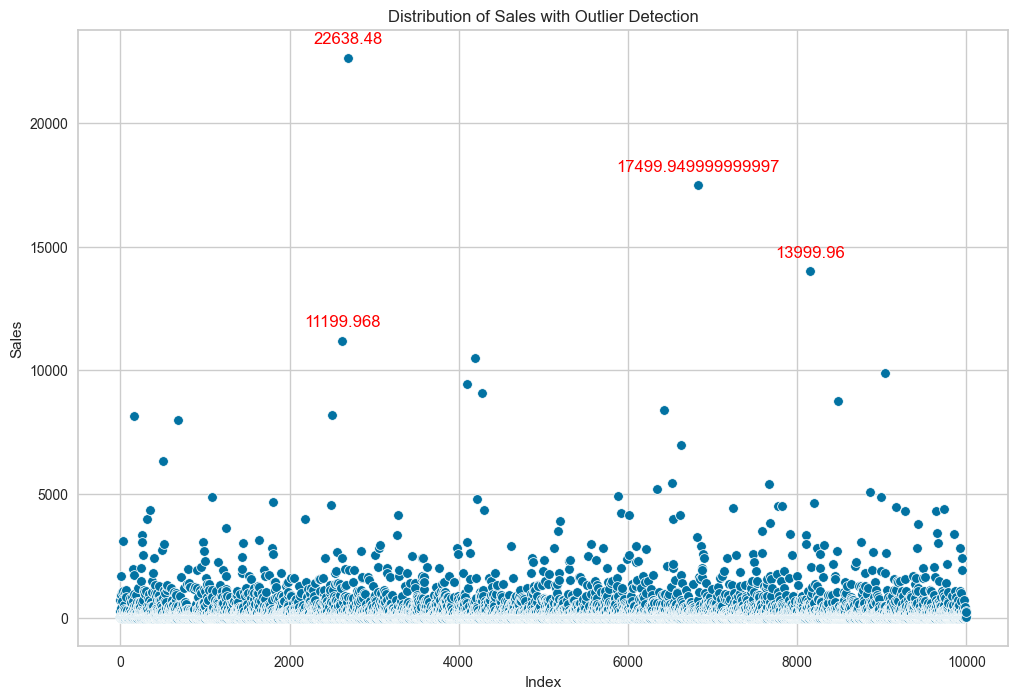

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x=df1.index, y='Sales')

plt.title('Distribution of Sales with Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Sales')

threshold = 10500
outliers = df1[df1['Sales'] > threshold]

for i in outliers.index:
    plt.annotate(f'{df1.loc[i, "Sales"]}', 
                 (i, df1.loc[i, 'Sales']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 color='red')

plt.show()

In [20]:
df1 = df1[df1['Sales']<10500]

### Normalization and Skewness Reduction Using ColumnTransformer

In [21]:
skewed_cols = ['Quantity',
 'Discount',
 'Profit',
 'Profit Margin',
 'Discounted Profit',
 'Discount Percentage',
 'Operating Expenses',
 'Net Profit',
 'Order Day',
 'Order Weekday',
 'Order Month',
 'Ship Day']

Skewness of Quantity: 1.2789427123198815
Kurtosis of Quantity: 1.9919693155988623


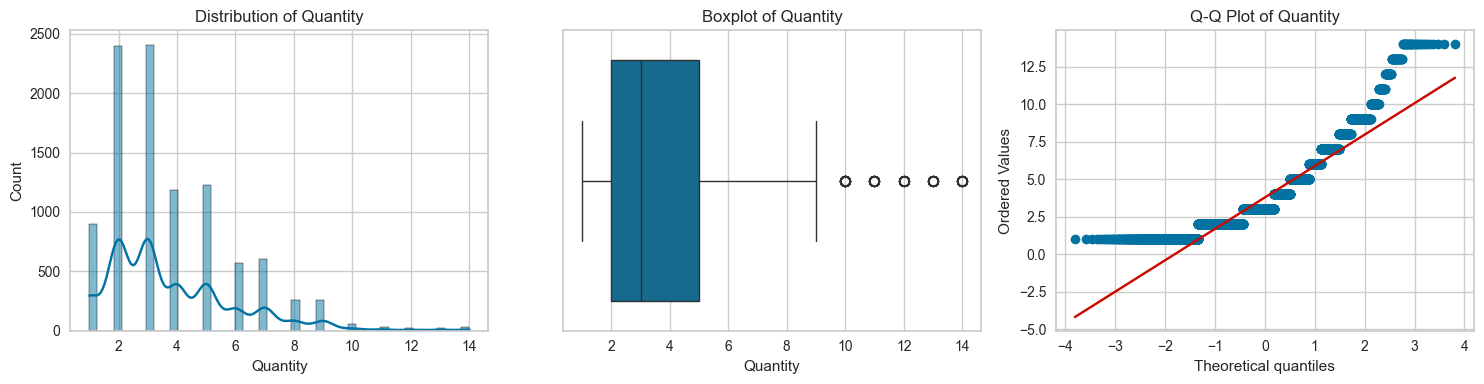

Skewness of Discount: 1.6846927639201847
Kurtosis of Discount: 2.411083149134195


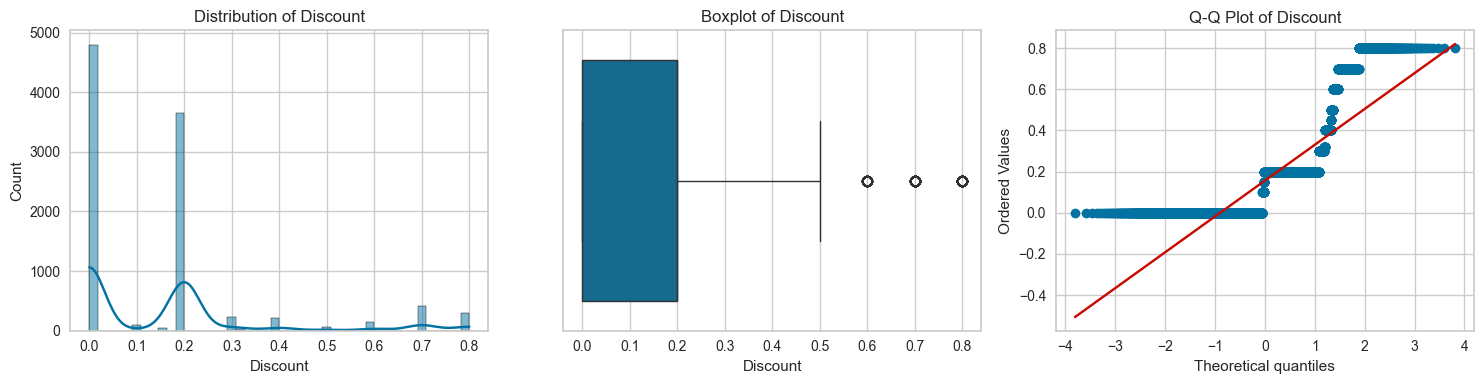

Skewness of Profit: 0.40659165398470837
Kurtosis of Profit: 280.2316123749574


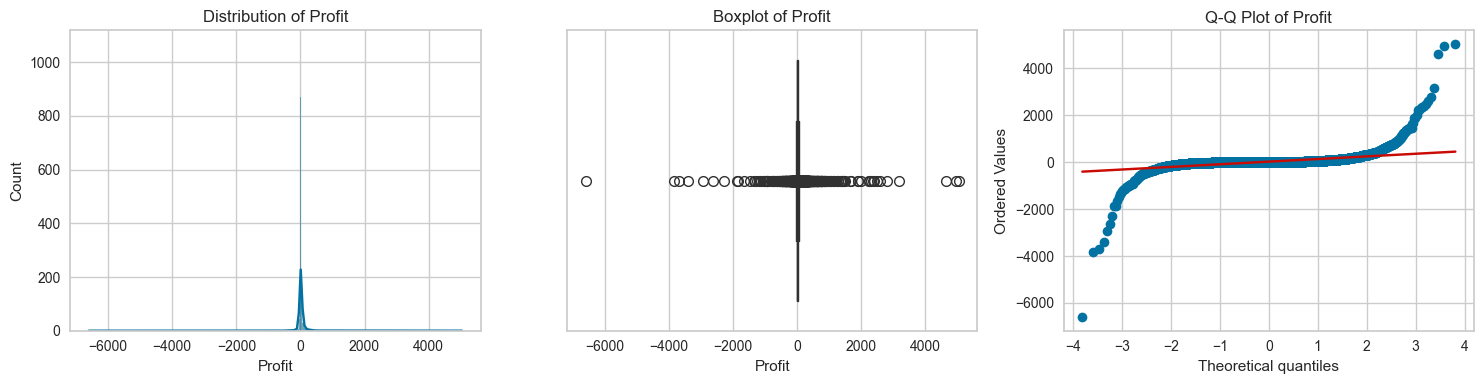

Skewness of Profit Margin: -2.8945624200193643
Kurtosis of Profit Margin: 10.170389659461748


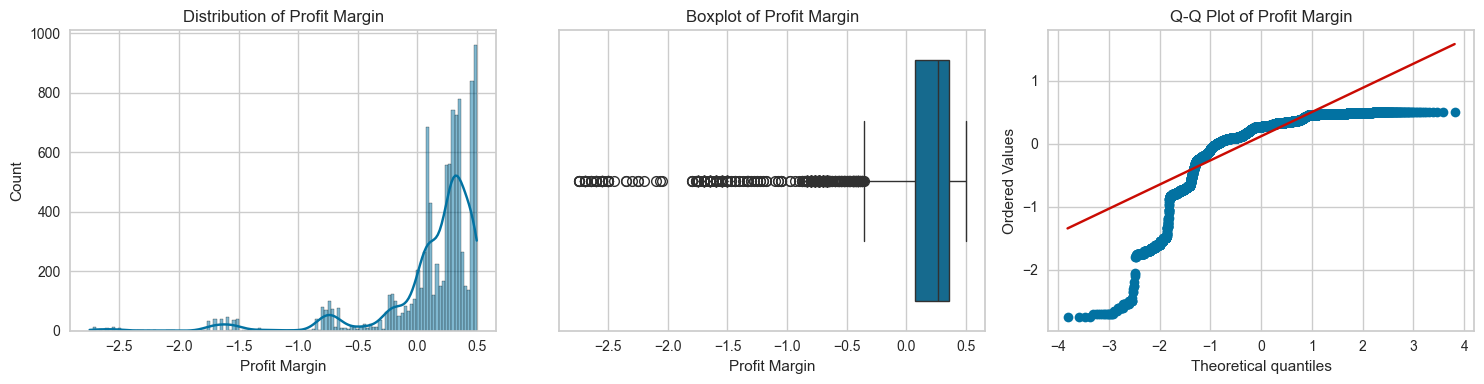

Skewness of Discounted Profit: 13.084780953717823
Kurtosis of Discounted Profit: 320.660127331973


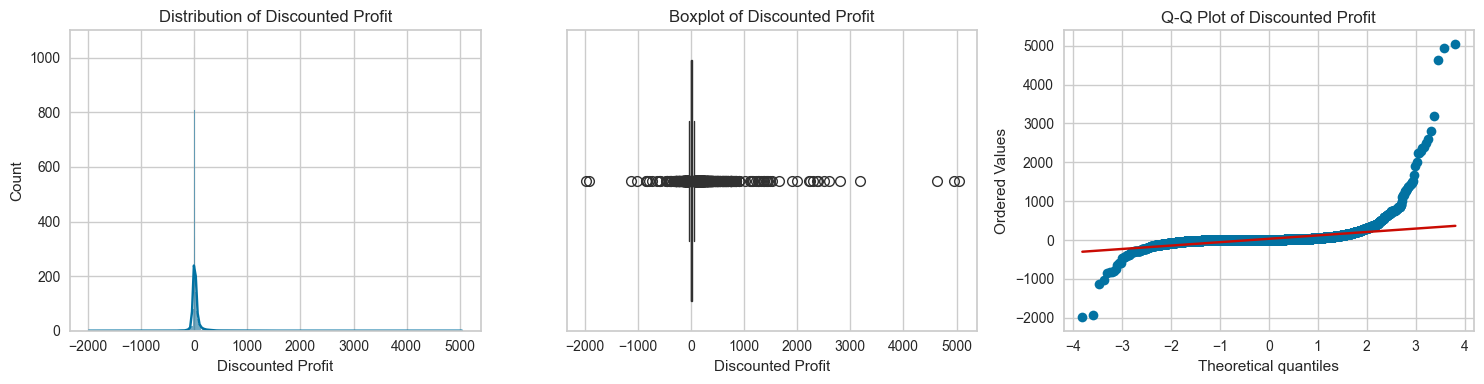

Skewness of Discount Percentage: 10.826594634688401
Kurtosis of Discount Percentage: 188.80513662515622


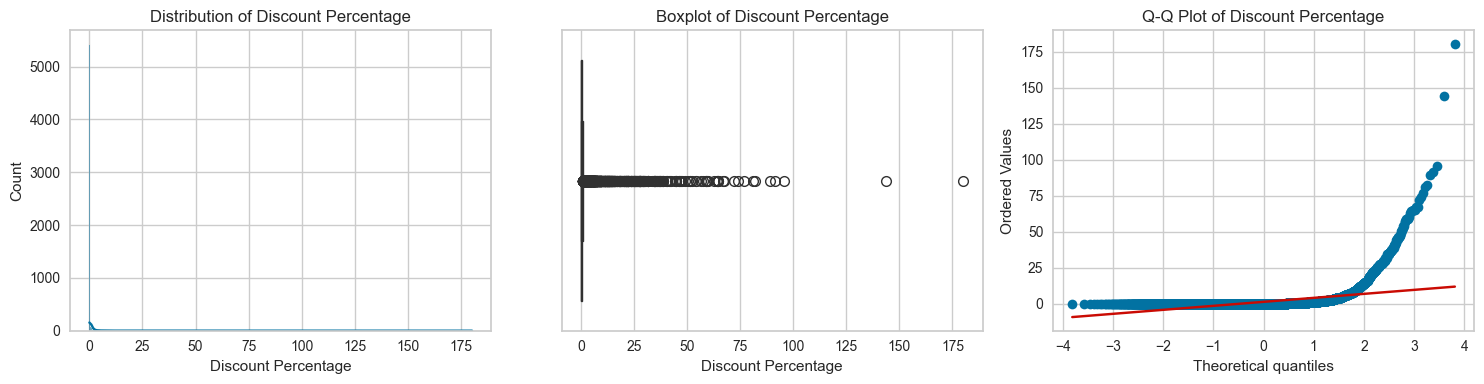

Skewness of Operating Expenses: 8.345445701123914
Kurtosis of Operating Expenses: 121.53662390228632


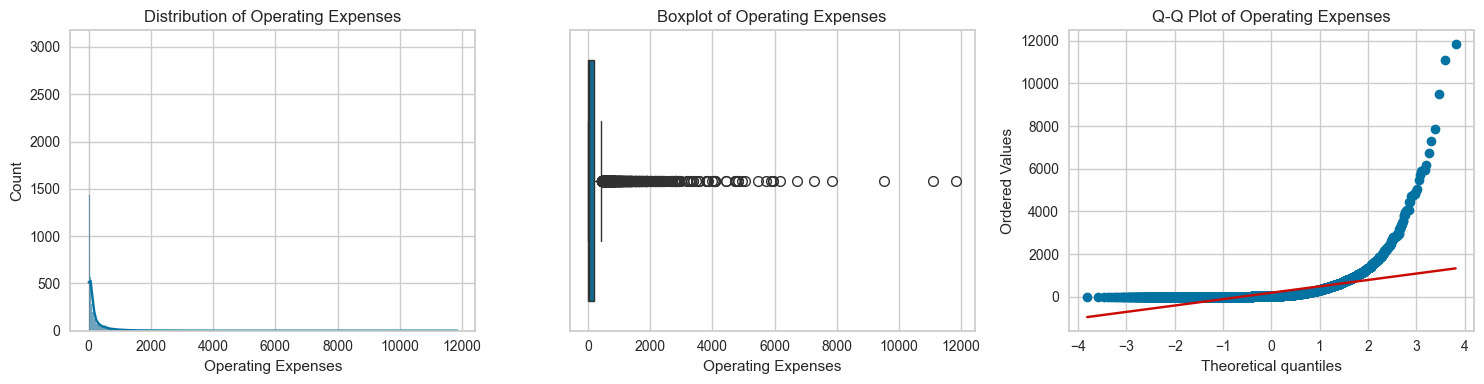

Skewness of Net Profit: 0.4044036563713729
Kurtosis of Net Profit: 280.03741342612244


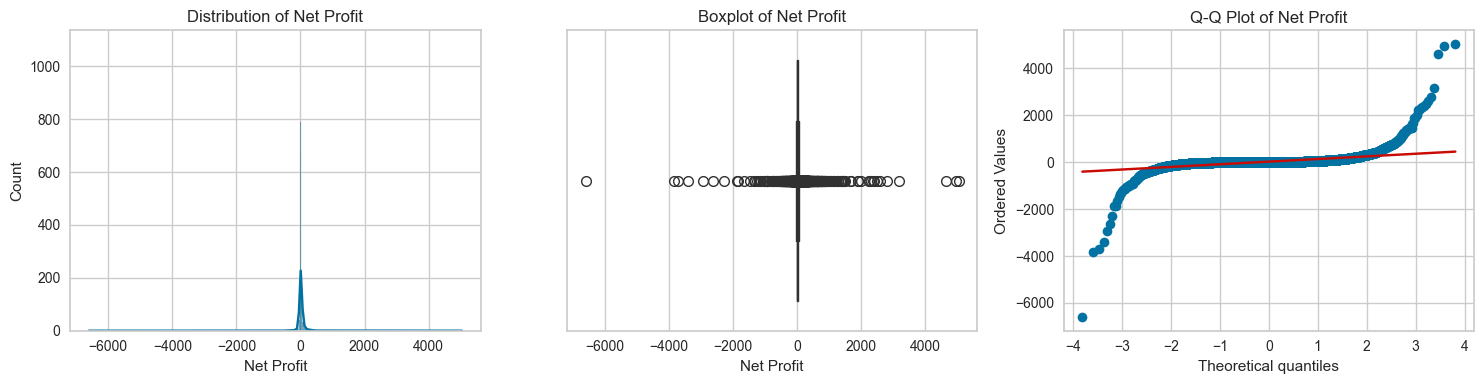

Skewness of Order Day: 0.013702209743765245
Kurtosis of Order Day: -1.186140164148391


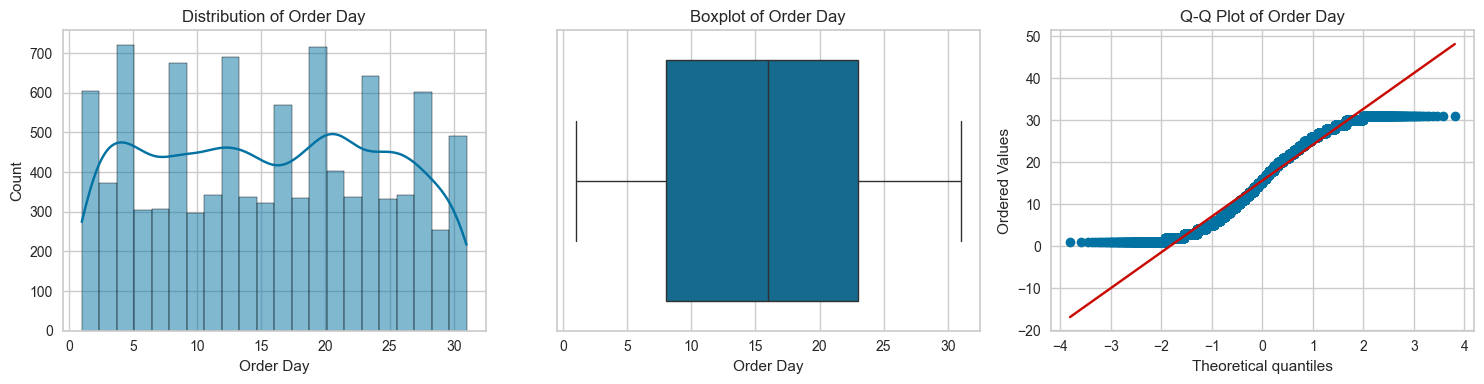

Skewness of Order Weekday: 0.12358185327624792
Kurtosis of Order Weekday: -1.087159692322008


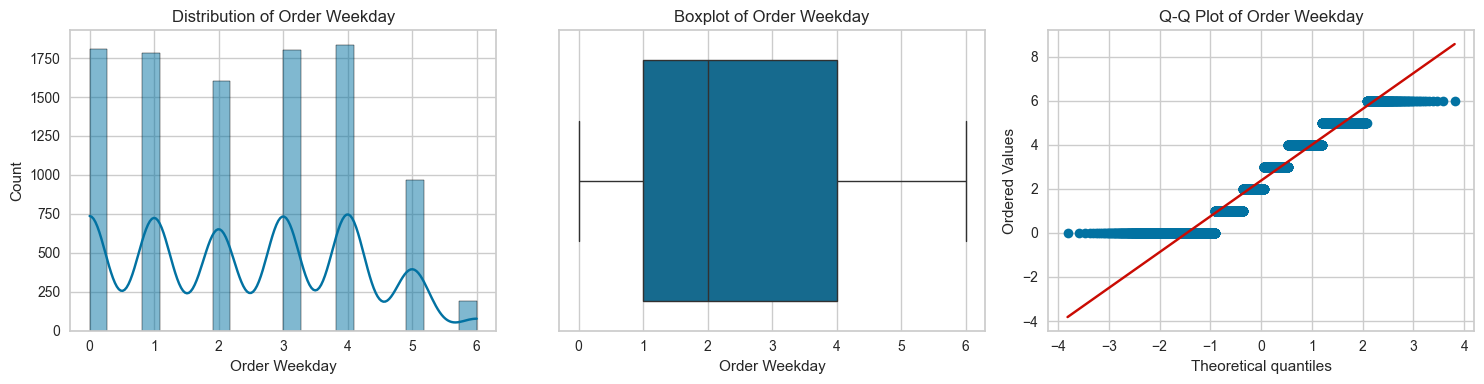

Skewness of Order Month: -0.43285276189411576
Kurtosis of Order Month: -0.9844272835181771


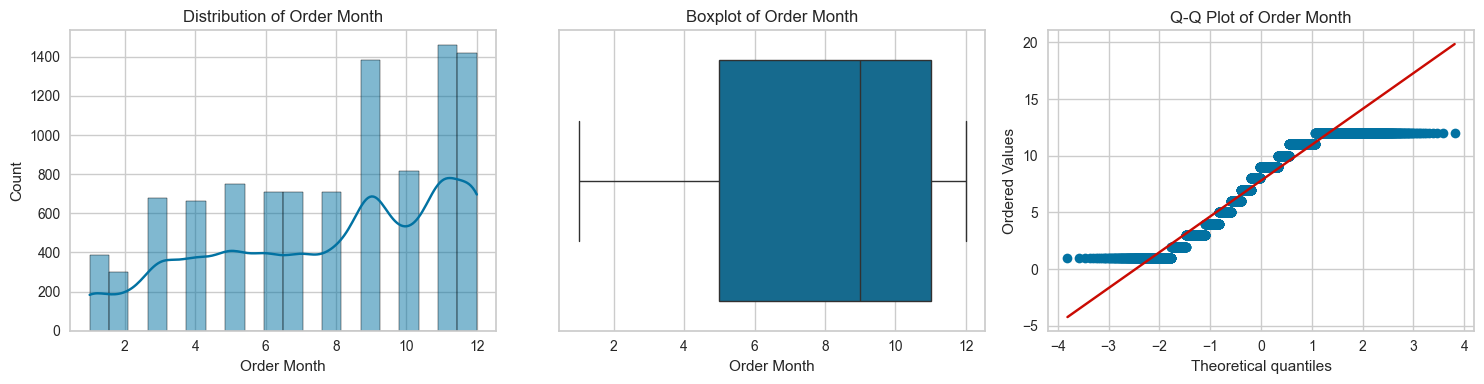

Skewness of Ship Day: -0.012121906020123951
Kurtosis of Ship Day: -1.206964125087663


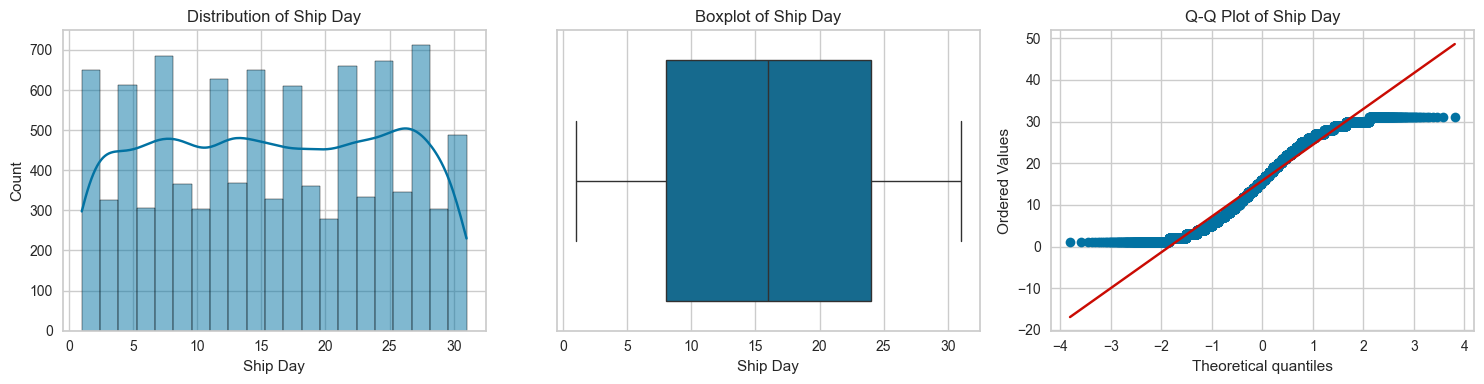

In [22]:
for col in skewed_cols:
    print(f"Skewness of {col}:",df1[col].skew())
    print(f"Kurtosis of {col}:",df1[col].kurt())

    fig, axes = plt.subplots(1,3,figsize=(15,4))
    
    sns.histplot(df1[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    
    # Box plot
    sns.boxplot(x=df1[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    
    # Q-Q plot
    probplot(df1[col], plot=axes[2])
    axes[2].set_title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [23]:
def apply_transform(data, col, transformer):
    if transformer == 'log1p' or transformer == 'sqrt':
        data[col] = data[col].apply(lambda x: x if x >= 0 else 0)
    col_tf = transformer.fit_transform(data[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    return col_tf

def transform_and_evaluate(df, skewed_cols, transformers):
    results = []
    for col in skewed_cols:
        before_skew = df[col].skew()
        before_kurt = df[col].kurt()
        for transformer_name, transformer in transformers.items():
            df[col + '_' + transformer_name] = apply_transform(df, col, transformer)
            after_skew = df[col + '_' + transformer_name].skew()
            after_kurt = df[col + '_' + transformer_name].kurt()
            results.append({
                'Column': col,
                'Transformer': transformer_name,
                'Before Skewness': before_skew,
                'Before Kurtosis': before_kurt,
                'After Skewness': after_skew,
                'After Kurtosis': after_kurt
            })
            df.drop(columns=[col + '_' + transformer_name], inplace=True)
    return pd.DataFrame(results)

In [24]:
transformers = {
    # 'reciprocal': FunctionTransformer(lambda x: 1/(x+0.000001)),
    # 'square': FunctionTransformer(np.square),
    'sqrt': FunctionTransformer(np.sqrt),
    'log1p': FunctionTransformer(np.log1p),
    'power': PowerTransformer()
}

results_df = transform_and_evaluate(df1, skewed_cols, transformers)
results_df

,Column,Transformer,Before Skewness,Before Kurtosis,After Skewness,After Kurtosis
0,Quantity,sqrt,1.278943,1.991969,0.554899,0.032128
1,Quantity,log1p,1.278943,1.991969,0.191117,-0.445708
2,Quantity,power,1.278943,1.991969,0.013357,-0.506032
3,Discount,sqrt,1.684693,2.411083,0.455860,-0.988861
4,Discount,log1p,1.684693,2.411083,1.316426,1.231580
5,Discount,power,1.684693,2.411083,0.299074,-1.359567
6,Profit,sqrt,0.406592,280.231612,3.687631,24.263691
7,Profit,log1p,0.406592,280.231612,0.359537,0.484427
8,Profit,power,0.406592,280.231612,2.165196,268.613300
9,Profit Margin,sqrt,-2.894562,10.170390,-0.919105,0.194372


In [25]:
def find_best_transformation(results_df):
    best_transformations = []

    for col in results_df['Column'].unique():
        col_results = results_df[results_df['Column'] == col].copy()
        col_results.loc[:, 'Score'] = col_results.apply(lambda x: abs(x['After Skewness']) + abs(x['After Kurtosis']), axis=1)
        best_row = col_results.loc[col_results['Score'].idxmin()]
        best_transformations.append(best_row)

    return pd.DataFrame(best_transformations)

best_transformations_df = find_best_transformation(results_df)
best_transformations_df

,Column,Transformer,Before Skewness,Before Kurtosis,After Skewness,After Kurtosis,Score
2,Quantity,power,1.278943,1.991969,0.013357,-0.506032,0.519390
3,Discount,sqrt,1.684693,2.411083,0.455860,-0.988861,1.444721
7,Profit,log1p,0.406592,280.231612,0.359537,0.484427,0.843964
11,Profit Margin,power,-2.894562,10.170390,-0.280131,-0.747027,1.027157
13,Discounted Profit,log1p,13.084781,320.660127,-0.000491,1.214361,1.214852
17,Discount Percentage,power,10.826595,188.805137,0.945853,-0.742109,1.687962
20,Operating Expenses,power,8.345446,121.536624,0.052678,-0.895320,0.947998
22,Net Profit,log1p,0.404404,280.037413,0.407298,0.228207,0.635504
25,Order Day,log1p,0.013702,-1.186140,-0.954409,0.090293,1.044702
29,Order Weekday,power,0.123582,-1.087160,-0.152827,-1.134366,1.287193


In [26]:
df1.isnull().sum()[df1.isnull().sum()>1]

Series([], dtype: int64)

In [27]:
df1.head()

,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin,Discounted Profit,Discount Percentage,Operating Expenses,Net Profit,...,Sub-Category_infrequent_sklearn,Product Name_GBC Premium Transparent Covers with Diagonal Lined Pattern,"Product Name_Global High-Back Leather Tilter, Burgundy","Product Name_Global Wood Trimmed Manager's Task Chair, Khaki",Product Name_KI Adjustable-Height Table,Product Name_Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,"Product Name_Situations Contoured Folding Chairs, 4/Set",Product Name_Staples,Product Name_Storex Dura Pro Binders,Product Name_infrequent_sklearn
0,42420,261.9600,2,0.00,41.9136,0.1600,41.91360,0.000000,220.0464,41.9136,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,42420,731.9400,3,0.00,219.5820,0.3000,219.58200,0.000000,512.3580,219.5820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,90036,14.6200,2,0.00,6.8714,0.4700,6.87140,0.000000,7.7486,6.8714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33311,957.5775,5,0.45,-383.0310,-0.4000,-210.66705,0.046994,1340.6085,-383.4810,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33311,22.3680,2,0.20,2.5164,0.1125,2.01312,0.894134,19.8516,2.3164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Splitting

In [28]:
df1 = df1.dropna()
df1.shape

(9990, 64)

In [29]:
X = df1.drop('Sales',axis=1)
y = df1['Sales']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (6993, 63)
X_test:  (2997, 63)
y_train:  (6993,)
y_test:  (2997,)


In [31]:
X_train.head()

,Postal Code,Quantity,Discount,Profit,Profit Margin,Discounted Profit,Discount Percentage,Operating Expenses,Net Profit,Order Year,...,Sub-Category_infrequent_sklearn,Product Name_GBC Premium Transparent Covers with Diagonal Lined Pattern,"Product Name_Global High-Back Leather Tilter, Burgundy","Product Name_Global Wood Trimmed Manager's Task Chair, Khaki",Product Name_KI Adjustable-Height Table,Product Name_Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,"Product Name_Situations Contoured Folding Chairs, 4/Set",Product Name_Staples,Product Name_Storex Dura Pro Binders,Product Name_infrequent_sklearn
5859,72032,2,0.0,45.2940,0.1500,45.29400,0.000000,256.6660,45.2940,2012,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3688,85204,6,0.2,7.9200,0.3125,6.33600,0.789141,17.4240,7.7200,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9934,19120,3,0.2,2.5146,0.0750,2.01168,0.596516,31.0134,2.3146,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5216,48066,2,0.0,8.2156,0.4700,8.21560,0.000000,9.2644,8.2156,2014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3763,53214,3,0.0,4.1748,0.4900,4.17480,0.000000,4.3452,4.1748,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
# from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures 
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline(steps=[
#     ('constant', DropConstantFeatures()),
#     ('duplicate', DropDuplicateFeatures()),
#     ('correlated', DropCorrelatedFeatures())
# ])

# X_train_transformed = pipeline.fit_transform(X_train)
# X_test_transformed = pipeline.transform(X_test)

# print('X_train_transformed: ',X_train_transformed.shape)
# print('X_test_transformed: ',X_test_transformed.shape)

### Feature Selection

In [33]:
ridge = SelectFromModel(estimator=Ridge(),max_features=10)
ridge.fit(X_train,y_train)

SelectFromModel(estimator=Ridge(), max_features=10)

In [34]:
selected_features = ridge.get_feature_names_out()
selected_features

array(['Discount', 'Profit', 'Operating Expenses', 'Net Profit'],
      dtype=object)

In [35]:
rf = SelectFromModel(estimator=RandomForestRegressor(),max_features=10)
rf.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestRegressor(), max_features=10)

In [36]:
selected_features = rf.get_feature_names_out()
selected_features

array(['Profit', 'Discounted Profit', 'Discount Percentage',
       'Operating Expenses', 'Net Profit'], dtype=object)

In [37]:
rfe = RFE(estimator=RandomForestRegressor(),n_features_to_select=10,step=5,verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 63 features.
Fitting estimator with 58 features.
Fitting estimator with 53 features.
Fitting estimator with 48 features.
Fitting estimator with 43 features.
Fitting estimator with 38 features.
Fitting estimator with 33 features.
Fitting estimator with 28 features.
Fitting estimator with 23 features.
Fitting estimator with 18 features.
Fitting estimator with 13 features.


RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=5,
    verbose=1)

In [38]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['Postal Code', 'Quantity', 'Discount', 'Profit', 'Profit Margin',
       'Discounted Profit', 'Discount Percentage', 'Operating Expenses',
       'Net Profit', 'Order Day'], dtype=object)

In [39]:
final_features = ['Quantity', 'Profit', 'Profit Margin', 'Discounted Profit','Discount',
       'Discount Percentage', 'Operating Expenses', 'Net Profit',
       'Order Day', 'Ship Day', 'Ship Weekday']

In [40]:
X_train = X_train[final_features]
X_test = X_test[final_features]

In [41]:
X_train.head()

,Quantity,Profit,Profit Margin,Discounted Profit,Discount,Discount Percentage,Operating Expenses,Net Profit,Order Day,Ship Day,Ship Weekday
5859,2,45.2940,0.1500,45.29400,0.0,0.000000,256.6660,45.2940,1,8,3
3688,6,7.9200,0.3125,6.33600,0.2,0.789141,17.4240,7.7200,3,6,4
9934,3,2.5146,0.0750,2.01168,0.2,0.596516,31.0134,2.3146,8,13,5
5216,2,8.2156,0.4700,8.21560,0.0,0.000000,9.2644,8.2156,10,16,1
3763,3,4.1748,0.4900,4.17480,0.0,0.000000,4.3452,4.1748,14,19,0


In [42]:
# log_transform：Net Profit, Discounted Profit, Profit, Ship Day, Order Day
# sqrt_transform：Discount, Order Month	
# power_transform：Quantity, Profit Margin, Discount Percentage, Operating Expenses, Order Weekday

transformer = ColumnTransformer(transformers=[
    ('log_transform',FunctionTransformer(np.log1p),['Discounted Profit','Net Profit','Profit','Order Day','Ship Day']),
    ('sqrt_transform',FunctionTransformer(np.sqrt),['Discount']),
    ('power_transform',PowerTransformer(),['Quantity','Discount Percentage','Operating Expenses','Profit Margin'])
],remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('log_transform',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Discounted Profit', 'Net Profit', 'Profit',
                                  'Order Day', 'Ship Day']),
                                ('sqrt_transform',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 ['Discount']),
                                ('power_transform', PowerTransformer(),
                                 ['Quantity', 'Discount Percentage',
                                  'Operating Expenses', 'Profit Margin'])])

In [43]:
final_X_train = transformer.fit_transform(X_train)
final_X_train = pd.DataFrame(final_X_train,columns=final_features)
final_X_train.head()

,Quantity,Profit,Profit Margin,Discounted Profit,Discount,Discount Percentage,Operating Expenses,Net Profit,Order Day,Ship Day,Ship Weekday
0,3.835012,3.835012,3.835012,0.693147,2.197225,0.000000,-0.838451,-0.757745,0.995166,-0.385224,3.0
1,1.992794,2.165619,2.188296,1.386294,1.945910,0.447214,1.088977,1.188020,-0.595375,0.361574,4.0
2,1.102498,1.198337,1.256926,2.197225,2.639057,0.447214,-0.146819,0.968039,-0.225907,-0.645927,5.0
3,2.220898,2.220898,2.220898,2.397895,2.833213,0.000000,-0.838451,-0.757745,-1.009947,1.370823,1.0
4,1.643801,1.643801,1.643801,2.708050,2.995732,0.000000,-0.146819,-0.757745,-1.502531,1.522159,0.0


In [44]:
final_X_test = transformer.transform(X_test)
final_X_test = pd.DataFrame(final_X_test,columns=final_features)
final_X_test.head()

,Quantity,Profit,Profit Margin,Discounted Profit,Discount,Discount Percentage,Operating Expenses,Net Profit,Order Day,Ship Day,Ship Weekday
0,3.360153,3.570715,3.576326,3.367296,3.401197,0.447214,0.362712,0.147701,0.190540,0.648673,2.0
1,NaN,NaN,NaN,3.218876,3.401197,0.894427,1.088977,1.416722,1.023052,-2.207201,0.0
2,5.615298,5.837130,5.837713,3.401197,3.465736,0.447214,1.088977,-0.715900,2.042765,-0.477483,0.0
3,NaN,NaN,NaN,3.332205,3.465736,0.547723,-0.146819,-0.088804,0.930976,-1.030323,0.0
4,NaN,NaN,NaN,3.258097,3.258097,0.894427,-1.883908,1.999288,-0.967897,-2.075665,5.0


In [45]:
print('Train data')
print(final_X_train.isnull().sum()[final_X_train.isnull().sum()>1])
print('Test data')
final_X_test.isnull().sum()[final_X_test.isnull().sum()>1]

Train data
Quantity         1174
Profit           1307
Profit Margin    1293
dtype: int64
Test data


Quantity         494
Profit           546
Profit Margin    542
dtype: int64

In [46]:
for col in final_X_train.columns:
    imputer = SimpleImputer(strategy='median')
    final_X_train[col] = imputer.fit_transform(final_X_train[[col]])

for col in final_X_test.columns:
    imputer = SimpleImputer(strategy='median')
    final_X_test[col] = imputer.fit_transform(final_X_test[[col]])

In [47]:
final_X_train.isnull().sum()

Quantity               0
Profit                 0
Profit Margin          0
Discounted Profit      0
Discount               0
Discount Percentage    0
Operating Expenses     0
Net Profit             0
Order Day              0
Ship Day               0
Ship Weekday           0
dtype: int64

In [48]:
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.values.reshape(-1,1))
y_test = imputer.transform(y_test.values.reshape(-1,1))

In [49]:
scaler = StandardScaler()
features = final_X_train.columns
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=features)
final_X_train.head()

,Quantity,Profit,Profit Margin,Discounted Profit,Discount,Discount Percentage,Operating Expenses,Net Profit,Order Day,Ship Day,Ship Weekday
0,0.867561,0.830624,0.826407,-2.749708,-0.604093,-0.961354,-0.838451,-0.757745,0.995166,-0.385224,-0.006000
1,-0.454287,-0.468778,-0.451967,-1.760367,-0.956226,0.604659,1.088977,1.188020,-0.595375,0.361574,0.476275
2,-1.093101,-1.221680,-1.175006,-0.602911,0.014988,0.604659,-0.146819,0.968039,-0.225907,-0.645927,0.958550
3,-0.290615,-0.425751,-0.426658,-0.316490,0.287033,-0.961354,-0.838451,-0.757745,-1.009947,1.370823,-0.970550
4,-0.704700,-0.874945,-0.874668,0.126200,0.514748,-0.961354,-0.146819,-0.757745,-1.502531,1.522159,-1.452824


In [50]:
print('final_X_train: ',final_X_train.shape)
print('final_X_test: ',final_X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

final_X_train:  (6993, 11)
final_X_test:  (2997, 11)
y_train:  (6993, 1)
y_test:  (2997, 1)


## Modeling & Evaluation

In [51]:
models = []
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

In [52]:
def trainAndEvaluate(model, X_train, X_test, y_train, y_test):
    if len(y_train.shape) > 1 and y_train.shape[1] == 1:
        y_train = y_train.ravel()
    if len(y_test.shape) > 1 and y_test.shape[1] == 1:
        y_test = y_test.ravel()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R2 Score:", r2)
    

    models.append(model)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    return model, final_X_test, y_test


def plot_graphs(model, X_test, y_test):
    try:
        if len(y_test.shape) > 1 and y_test.shape[1] == 1:
            y_test = y_test.ravel()
        prediction_error = PredictionError(estimator=model)
        prediction_error.score(X_test, y_test)
        prediction_error.show()
        
        res_plot = ResidualsPlot(estimator=model)
        res_plot.score(X_test, y_test)
        res_plot.show()
        
    except Exception as e:
        print(f"An error occurred while plotting: {e}")

Mean Absolute Error: 213.6568018091142
Mean Squared Error: 158915.01333804417
Root Mean Squared Error: 398.64145963264303
R2 Score: 0.38015323528244094


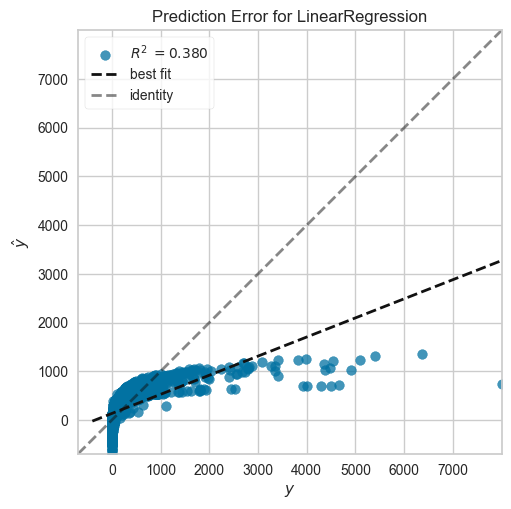

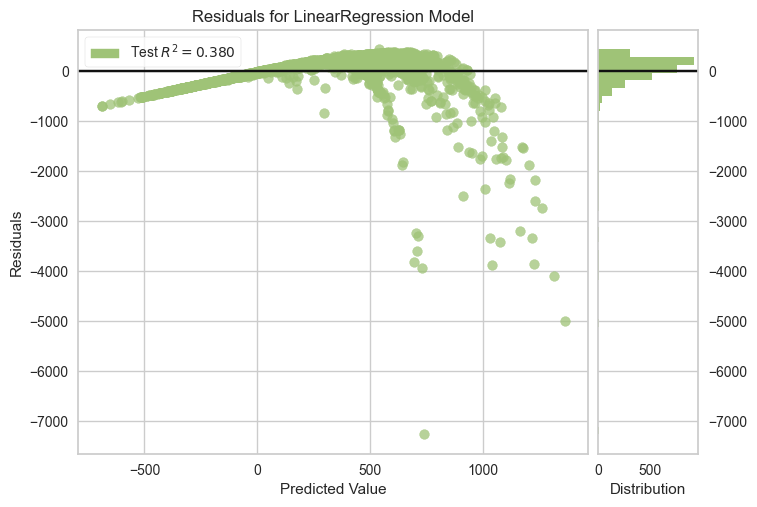

In [53]:
model, final_X_test, y_test = trainAndEvaluate(LinearRegression(), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

Mean Absolute Error: 212.69420248655953
Mean Squared Error: 158776.35789246036
Root Mean Squared Error: 398.46751171514643
R2 Score: 0.3806940597618296


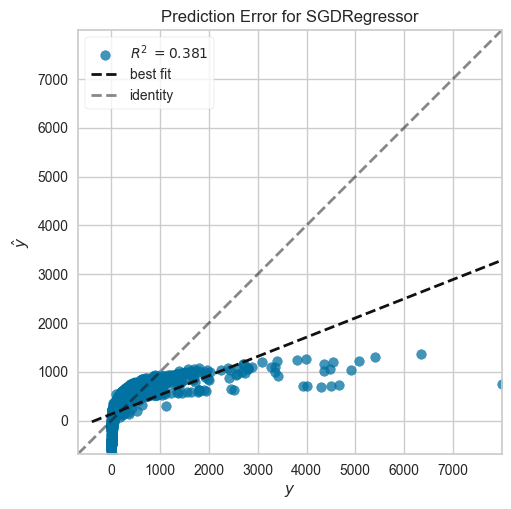

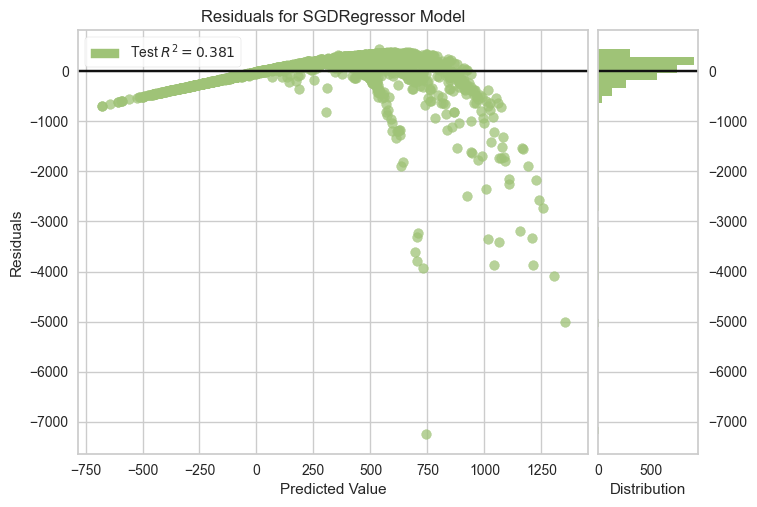

In [54]:
model, final_X_test, y_test = trainAndEvaluate(SGDRegressor(), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

Mean Absolute Error: 213.65178066655997
Mean Squared Error: 158912.18654116875
Root Mean Squared Error: 398.63791407889033
R2 Score: 0.3801642611815108


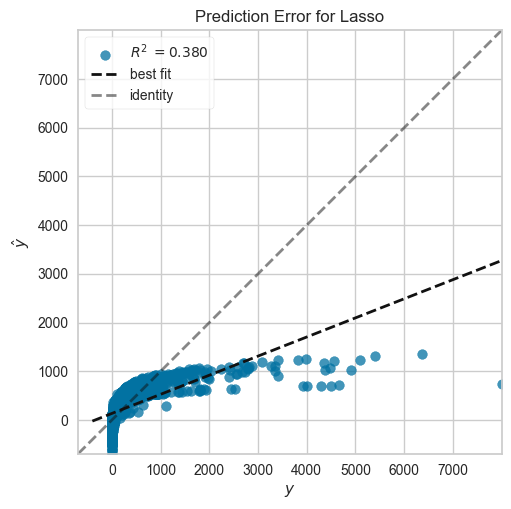

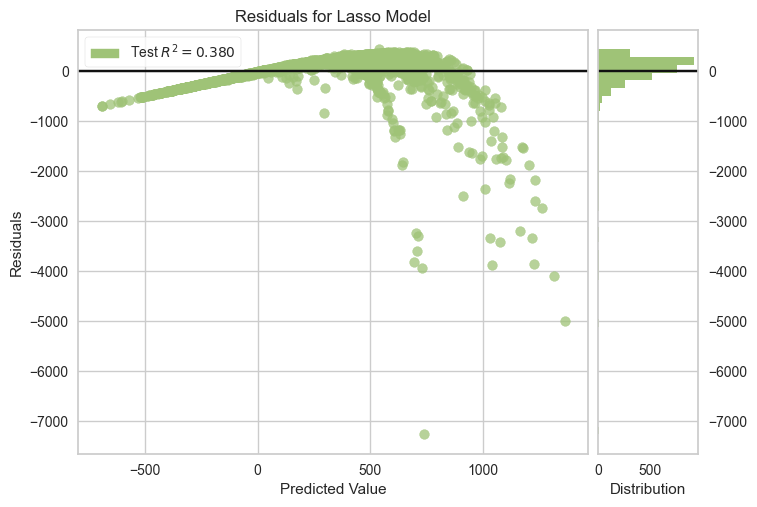

In [55]:
model, final_X_test, y_test = trainAndEvaluate(Lasso(alpha=0.01), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

Mean Absolute Error: 213.65678749764535
Mean Squared Error: 158915.0114739155
Root Mean Squared Error: 398.64145729454117
R2 Score: 0.38015324255346017


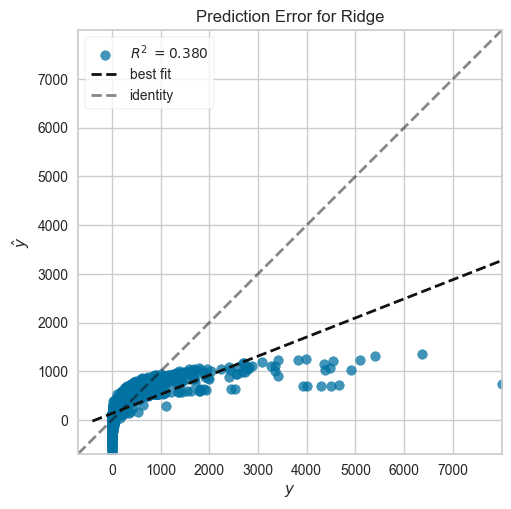

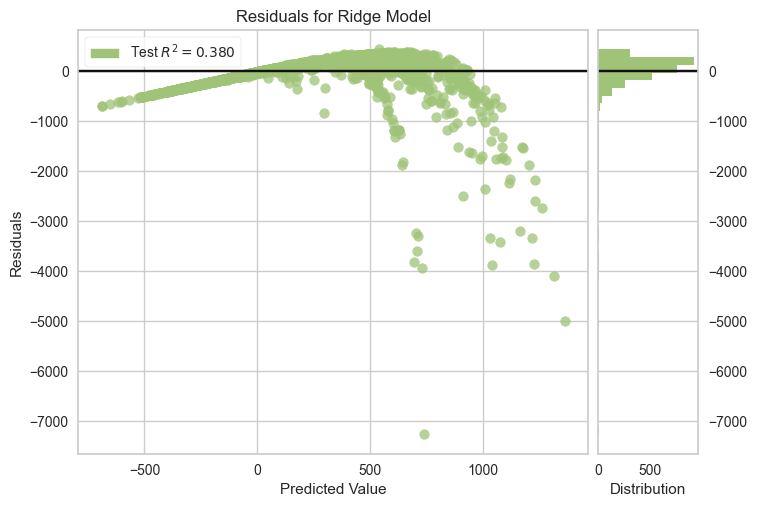

In [56]:
model, final_X_test, y_test = trainAndEvaluate(Ridge(alpha=0.001), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

Mean Absolute Error: 20.50923183131817
Mean Squared Error: 8127.607599513182
Root Mean Squared Error: 90.15324508587132
R2 Score: 0.9682983302229883


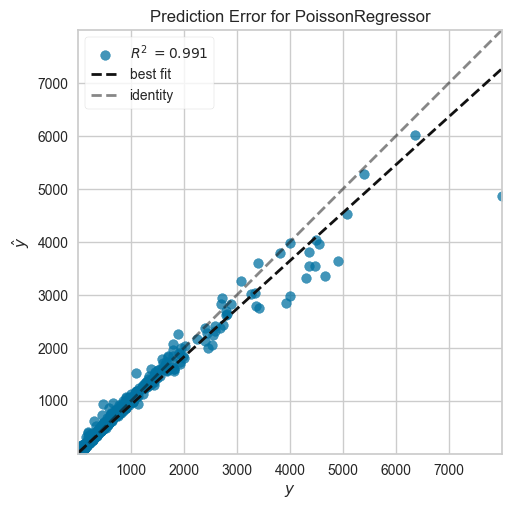

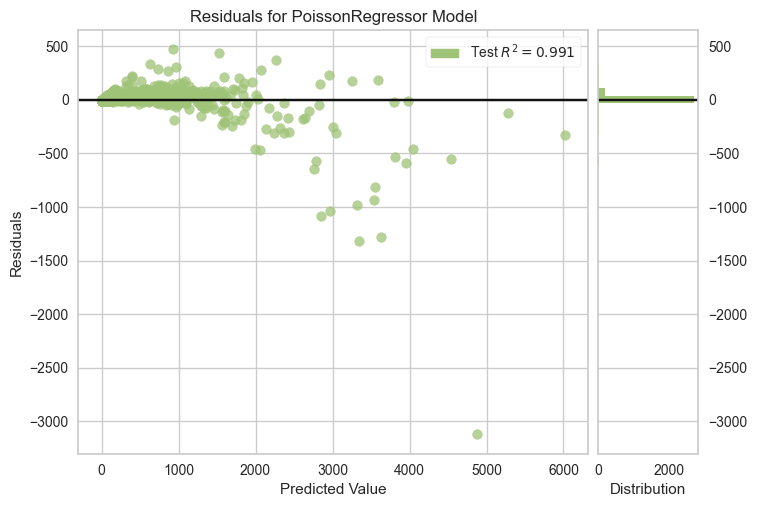

In [57]:
model, final_X_test, y_test = trainAndEvaluate(PoissonRegressor(), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

Mean Absolute Error: 56.58380567901234
Mean Squared Error: 67102.92182528114
Root Mean Squared Error: 259.04231666907464
R2 Score: 0.7382655790487334


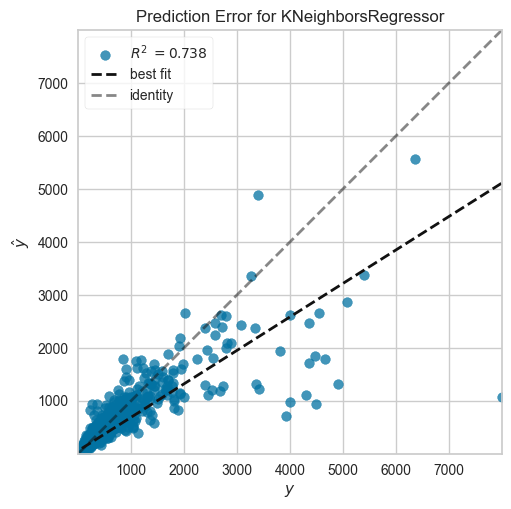

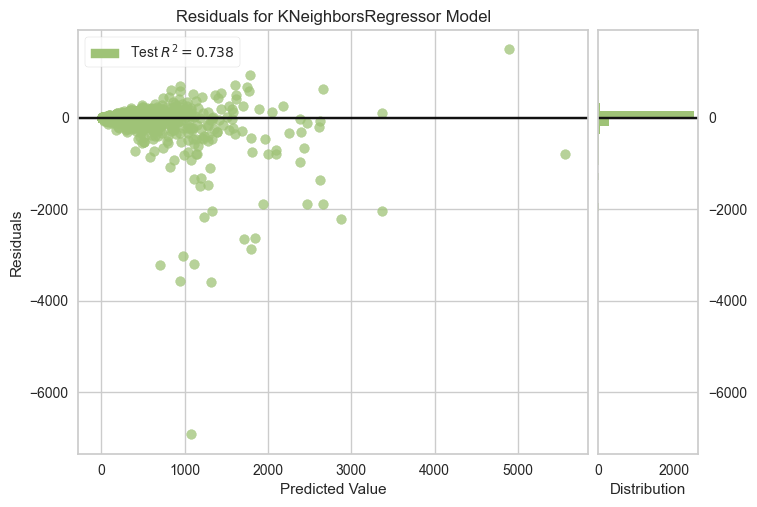

In [58]:
model, final_X_test, y_test = trainAndEvaluate(KNeighborsRegressor(), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

Mean Absolute Error: 17.166289022355688
Mean Squared Error: 39661.41554932752
Root Mean Squared Error: 199.15174001079558
R2 Score: 0.8453009593242506


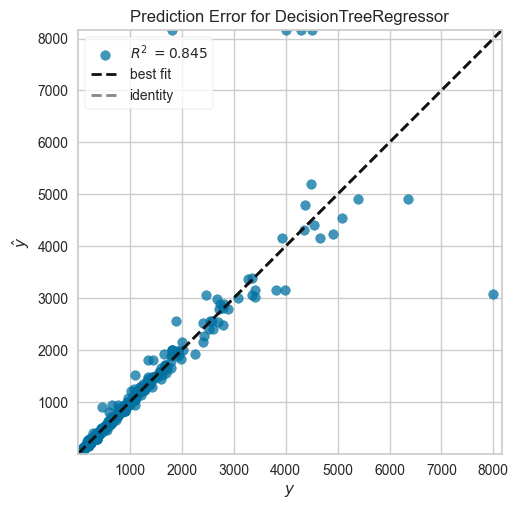

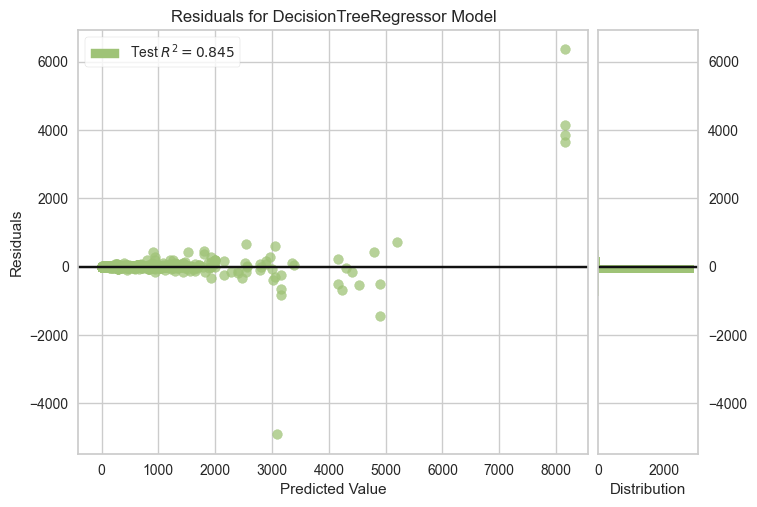

In [59]:
model, final_X_test, y_test = trainAndEvaluate(DecisionTreeRegressor(), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

Mean Absolute Error: 7.9244081314648005
Mean Squared Error: 4353.784587401823
Root Mean Squared Error: 65.98321443671733
R2 Score: 0.9830180973207512


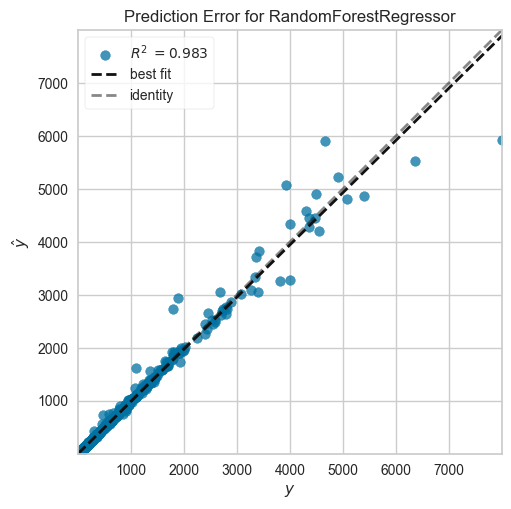

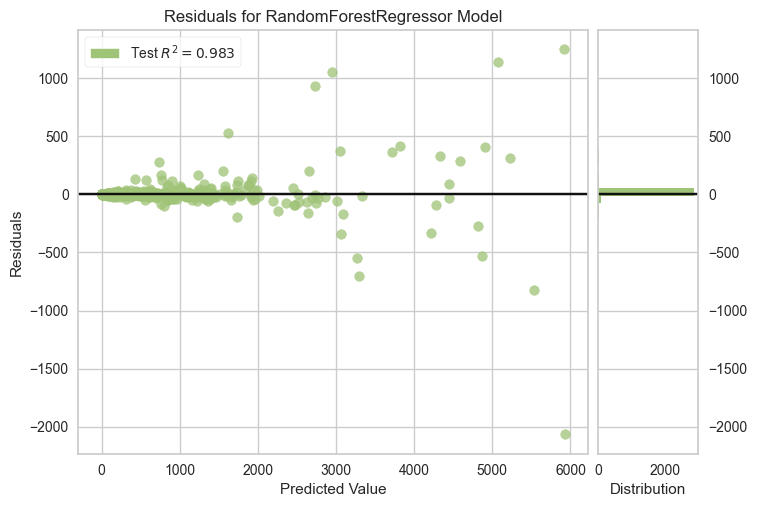

In [60]:
model, final_X_test, y_test = trainAndEvaluate(RandomForestRegressor(), final_X_train, final_X_test, y_train,y_test)
plot_graphs(model, final_X_test, y_test)

In [61]:
model_perfs = pd.DataFrame({'Model': models, 
                            'R2': r2_scores, 
                            'MAE': mae_scores, 
                            'MSE': mse_scores, 
                            'RMSE': rmse_scores}).sort_values('R2',ascending=False).reset_index(drop=True)
model_perfs

,Model,R2,MAE,MSE,RMSE
0,"(DecisionTreeRegressor(max_features=1.0, rando...",0.983018,7.924408,4353.784587,65.983214
1,PoissonRegressor(),0.968298,20.509232,8127.607600,90.153245
2,DecisionTreeRegressor(),0.845301,17.166289,39661.415549,199.151740
3,KNeighborsRegressor(),0.738266,56.583806,67102.921825,259.042317
4,SGDRegressor(),0.380694,212.694202,158776.357892,398.467512
5,Lasso(alpha=0.01),0.380164,213.651781,158912.186541,398.637914
6,Ridge(alpha=0.001),0.380153,213.656787,158915.011474,398.641457
7,LinearRegression(),0.380153,213.656802,158915.013338,398.641460


In [62]:
model_perfs.at[0, 'Model'] = 'RandomForestRegressor()'

In [63]:
model_perfs

,Model,R2,MAE,MSE,RMSE
0,RandomForestRegressor(),0.983018,7.924408,4353.784587,65.983214
1,PoissonRegressor(),0.968298,20.509232,8127.607600,90.153245
2,DecisionTreeRegressor(),0.845301,17.166289,39661.415549,199.151740
3,KNeighborsRegressor(),0.738266,56.583806,67102.921825,259.042317
4,SGDRegressor(),0.380694,212.694202,158776.357892,398.467512
5,Lasso(alpha=0.01),0.380164,213.651781,158912.186541,398.637914
6,Ridge(alpha=0.001),0.380153,213.656787,158915.011474,398.641457
7,LinearRegression(),0.380153,213.656802,158915.013338,398.641460


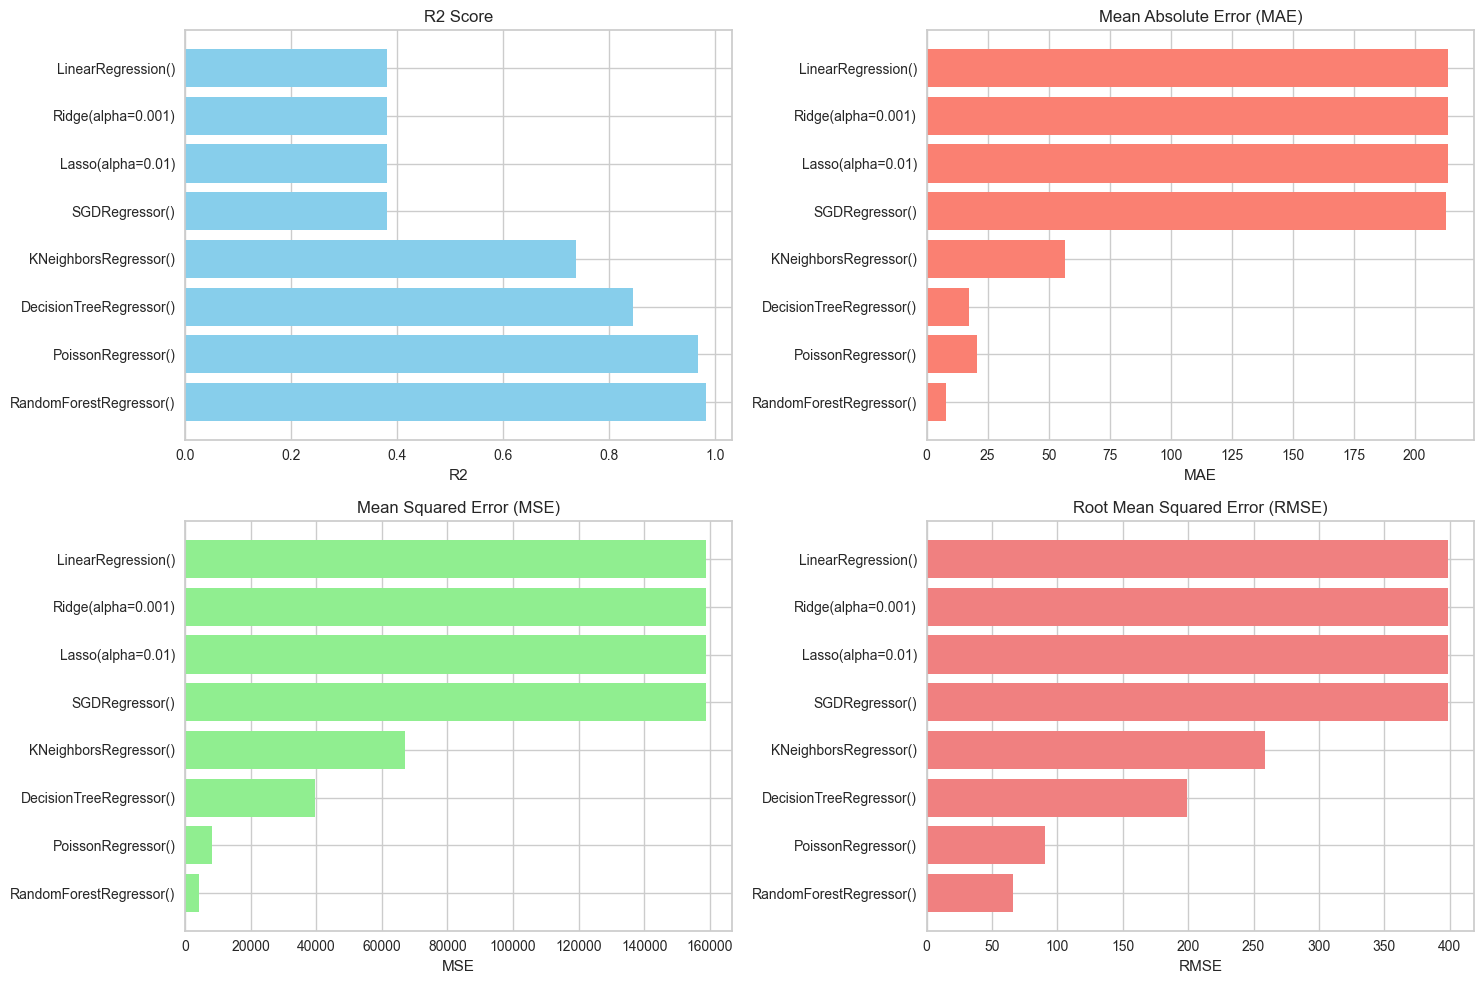

In [64]:
model_perfs['Model'] = model_perfs['Model'].astype('str')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# R2 Score
axs[0, 0].barh(model_perfs['Model'], model_perfs['R2'], color='skyblue')
axs[0, 0].set_title('R2 Score')
axs[0, 0].set_xlabel('R2')

# MAE
axs[0, 1].barh(model_perfs['Model'], model_perfs['MAE'], color='salmon')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xlabel('MAE')

# MSE
axs[1, 0].barh(model_perfs['Model'], model_perfs['MSE'], color='lightgreen')
axs[1, 0].set_title('Mean Squared Error (MSE)')
axs[1, 0].set_xlabel('MSE')

# RMSE
axs[1, 1].barh(model_perfs['Model'], model_perfs['RMSE'], color='lightcoral')
axs[1, 1].set_title('Root Mean Squared Error (RMSE)')
axs[1, 1].set_xlabel('RMSE')

plt.tight_layout()
plt.show()

### Select the best model

In [65]:
from sklearn.model_selection import GridSearchCV
# then tune the parameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(final_X_train, y_train.ravel())

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(final_X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [66]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [67]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Absolute Error: 7.530318304971641
Mean Squared Error: 3861.446849788698
Root Mean Squared Error: 62.14054111277675
R2 Score: 0.9849384568097486
